# Hello Homes A Local Real Estate Agency 

**Authors:** Monique Hercules 
***

## Overview


use multiple linear regression modeling to analyze house sales in a northwestern county.

## Business Problem

Our stakeholder are local real estate agency that help homeowners buy/sell homes. We will provide evidencial advice about how a  home renovation might increase the estimated value of their homes and by what amount. By targeting this information the real es
tate agency will have highier KPI's 

## Data Understanding 

Import revelant libraries, and inspect data 

In [377]:

import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [378]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Exploratory Data Analysis for Understanding the Distribution of the Dataset

Checking for Linearity relation for the target variable "Price"

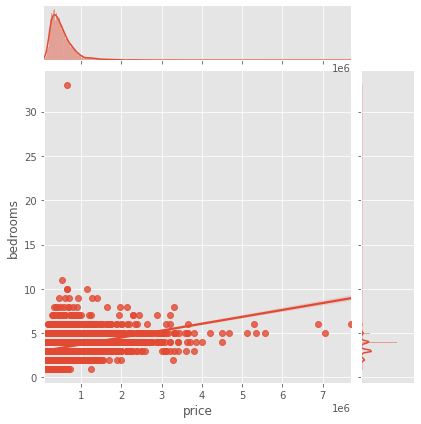

In [379]:
sns.jointplot(x='price',y='bedrooms' , data=df, kind='reg')
#A linear relation 

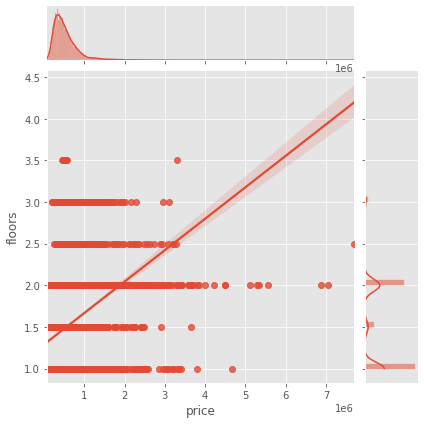

In [380]:
sns.jointplot(x='price', y='floors', data=df, kind='reg' )
#No linear relation 

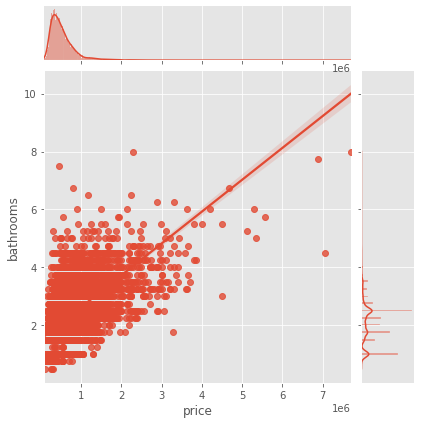

In [381]:
sns.jointplot(x='price', y='bathrooms', data=df, kind='reg')
#Some linear relation 

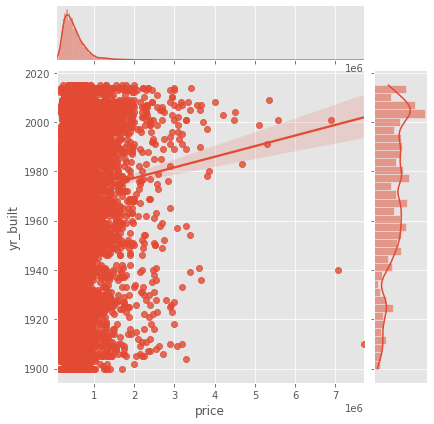

In [382]:
sns.jointplot(x='price', y='yr_built', data=df, kind='reg')
#No Linear relation

In [383]:
df_yr_renovated = df.loc[df['yr_renovated'] > 1900]
df_yr_renovated.shape

(744, 21)

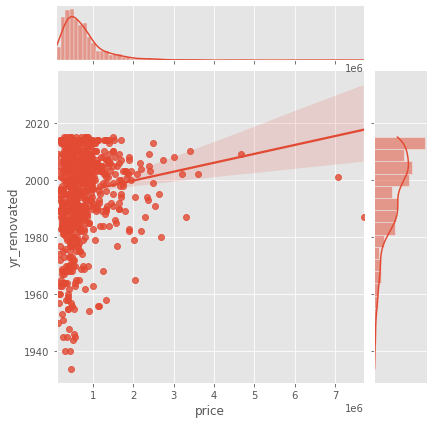

In [384]:
sns.jointplot(x='price', y='yr_renovated', data=df_yr_renovated, kind='reg')
#No Linear relation

Used to identify data that has missing data and to determine which data type is each column 

## Cleaning Data 

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [386]:
df.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [421]:
# bedroom count must be greater than 1
df_cleaned = df.loc[df['bedrooms'] > 0]
df_cleaned = df_cleaned.loc[df_cleaned['bathrooms'] >= 1]
df_cleaned = df_cleaned.loc[df_cleaned['price'] >= 0]

#cleanig
df_cleaned = df_cleaned.iloc[:,:] 
df_cleaned.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.152200e+04,2.152200e+04,21522.000000,21522.000000,21522.000000,2.152200e+04,21522.000000,21522.000000,21522.000000,17696.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000
mean,4.581892e+09,5.411623e+05,3.378264,2.120632,2084.360143,1.509582e+04,1.495516,1791.888486,1971.094787,83.579227,98077.899126,47.560159,-122.213966,1988.426122,12745.368042
std,2.877853e+09,3.676266e+05,0.922526,0.765986,916.851534,4.147001e+04,0.539884,827.034046,29.352911,399.819767,53.500445,0.138566,0.140369,685.167427,27284.102253
min,1.000102e+06,7.800000e+04,1.000000,1.000000,390.000000,5.200000e+02,1.000000,390.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.230000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,1952.000000,0.000000,98033.000000,47.471125,-122.328000,1490.000000,5100.000000
50%,3.904935e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.616500e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312350e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.066075e+04,2.000000,2220.000000,1997.000000,0.000000,98117.000000,47.678075,-122.125000,2370.000000,10080.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [422]:
df_cleaned = df_cleaned.loc[df_cleaned['waterfront'].notna()]
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930


In [423]:
df_cleaned.shape

(19152, 21)

### Checking for missing values 

In [424]:
df_cleaned.isna().sum()
#All the columns that have null values are not going to be used, but dropped 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3396
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [425]:
#Clean up view and yr_renovated 

In [426]:
df_cleaned.shape 

(19152, 21)

## Checking for multicollinearity 

In [427]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
corr = df_cleaned[feats].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.307801,0.526585,0.704367,0.087260,0.257012,0.608502,0.051393,0.122986,-0.049504,0.305246,0.021647,0.581717,0.081740
bedrooms,0.307801,1.000000,0.512017,0.575458,0.029867,0.179159,0.477416,0.153193,0.016888,-0.151105,-0.011620,0.132832,0.391799,0.028962
bathrooms,0.526585,0.512017,1.000000,0.755041,0.085857,0.505086,0.686534,0.505258,0.048142,-0.201619,0.024849,0.225386,0.569577,0.087338
sqft_living,0.704367,0.575458,0.755041,1.000000,0.174135,0.355118,0.876900,0.314836,0.050729,-0.195975,0.053537,0.240960,0.755752,0.184125
sqft_lot,0.087260,0.029867,0.085857,0.174135,1.000000,-0.007088,0.184960,0.055924,0.001705,-0.129468,-0.085785,0.230275,0.146313,0.723375
floors,0.257012,0.179159,0.505086,0.355118,-0.007088,1.000000,0.524279,0.488962,0.000273,-0.058206,0.051155,0.128323,0.279747,-0.010659
sqft_above,0.608502,0.477416,0.686534,0.876900,0.184960,0.524279,1.000000,0.419926,0.019797,-0.258343,0.002555,0.344730,0.733080,0.193539
yr_built,0.051393,0.153193,0.505258,0.314836,0.055924,0.488962,0.419926,1.000000,-0.224156,-0.346977,-0.148218,0.412264,0.324522,0.071393
yr_renovated,0.122986,0.016888,0.048142,0.050729,0.001705,0.000273,0.019797,-0.224156,1.000000,0.069017,0.033260,-0.071564,-0.005818,0.002613
zipcode,-0.049504,-0.151105,-0.201619,-0.195975,-0.129468,-0.058206,-0.258343,-0.346977,0.069017,1.000000,0.273028,-0.562736,-0.278107,-0.145802


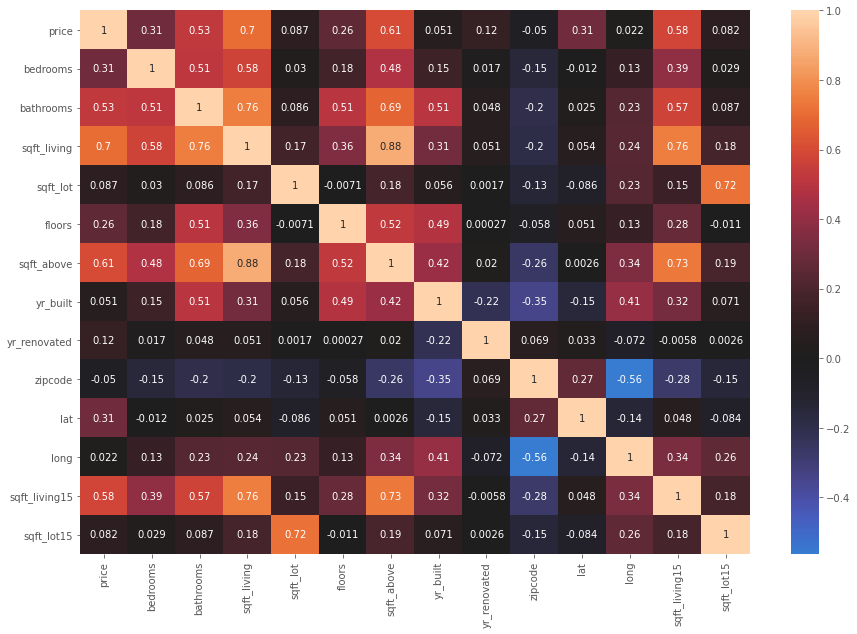

In [428]:
_, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, center=0, annot=True, ax=ax);
#Need to add analysis 

## Determining Numeric and Catagorical features

## Normalizing the Data 

In [429]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19152 entries, 1 to 21593
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19152 non-null  int64  
 1   date           19152 non-null  object 
 2   price          19152 non-null  float64
 3   bedrooms       19152 non-null  int64  
 4   bathrooms      19152 non-null  float64
 5   sqft_living    19152 non-null  int64  
 6   sqft_lot       19152 non-null  int64  
 7   floors         19152 non-null  float64
 8   waterfront     19152 non-null  object 
 9   view           19095 non-null  object 
 10  condition      19152 non-null  object 
 11  grade          19152 non-null  object 
 12  sqft_above     19152 non-null  int64  
 13  sqft_basement  19152 non-null  object 
 14  yr_built       19152 non-null  int64  
 15  yr_renovated   15756 non-null  float64
 16  zipcode        19152 non-null  int64  
 17  lat            19152 non-null  float64
 18  long  

### Normalizing Numerical Features

In [430]:
numeric_feats = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','yr_built','yr_renovated','zipcode','lat', 'lat', 'long', 'sqft_living15','sqft_lot15']

def norm_feat(series):
    return (series - series.mean())/series.std()

# Explain
for feat in numeric_feats:
    df_cleaned[feat] = norm_feat(df_cleaned[feat])
df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.915200e+04,1.915200e+04,1.915200e+04,1.915200e+04,1.915200e+04,1.915200e+04,1.915200e+04,1.915200e+04,1.915200e+04,1.575600e+04,1.915200e+04,1.915200e+04,1.915200e+04,1.915200e+04,1.915200e+04
mean,4.594432e+09,5.425494e+05,-1.884689e-16,1.899529e-16,-8.310441e-17,2.968015e-18,2.374412e-17,-1.305926e-16,-1.282182e-15,4.329278e-17,-5.482072e-14,-1.799359e-17,-7.184822e-14,8.904044e-17,-1.780809e-17
std,2.878275e+09,3.725191e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000102e+06,7.800000e+04,-2.574191e+00,-1.463930e+00,-1.841582e+00,-3.559261e-01,-9.187758e-01,-1.690492e+00,-2.422763e+00,-2.072552e-01,-1.434784e+00,-2.913538e+00,-2.172764e+00,-2.322667e+00,-4.401769e-01
25%,2.124049e+09,3.230000e+05,-4.109692e-01,-4.854108e-01,-7.127026e-01,-2.453427e-01,-9.187758e-01,-7.157458e-01,-6.517859e-01,-2.072552e-01,-8.359720e-01,-6.410884e-01,-8.120788e-01,-7.291766e-01,-2.789010e-01
50%,3.905082e+09,4.510000e+05,-4.109692e-01,1.669355e-01,-1.808268e-01,-1.822221e-01,6.522308e-03,-2.704912e-01,1.315308e-01,-2.072552e-01,-2.371605e-01,8.635501e-02,-1.174884e-01,-2.179743e-01,-1.875512e-01
75%,7.334801e+09,6.450000e+05,6.706416e-01,4.931087e-01,5.030135e-01,-1.068383e-01,9.318204e-01,5.117129e-01,8.807903e-01,-2.072552e-01,7.359082e-01,8.512881e-01,6.340940e-01,5.415263e-01,-9.821331e-02
max,9.900000e+09,7.700000e+06,3.203735e+01,7.668918e+00,1.243223e+01,4.003242e+01,3.707715e+00,9.164093e+00,1.493821e+00,4.872010e+00,2.270363e+00,1.568638e+00,6.404538e+00,6.164752e+00,3.111715e+01


In [431]:
#Saved cleaned data 
df_cleaned.to_csv("data/kc_house_data_cleaned.csv", index=False)

 ## One Hot Encoding

In [432]:
categorical_feats = ['date', 'price', 'bedrooms', 'sqft_living', 'waterfront','view', 'grade','zipcode']
#Don't include prod_id, set_name, prod_desc, or prod_long_desc; they are too unique
df_categorical_cleaned = df_cleaned[categorical_feats]
df_categorical_cleaned = pd.get_dummies(df_categorical_cleaned, drop_first=True)
df_categorical_cleaned.head()


,price,bedrooms,sqft_living,zipcode,date_1/12/2015,date_1/13/2015,date_1/14/2015,date_1/15/2015,date_1/16/2015,date_1/17/2015,...,view_NONE,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,538000.0,-0.410969,0.524723,0.885611,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,180000.0,-1.492580,-1.429107,-0.929536,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,604000.0,0.670642,-0.137408,1.091453,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,510000.0,-0.410969,-0.441337,-0.068745,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,1230000.0,0.670642,3.618286,-0.461715,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


## Modeling 

Fitting the Initial Model 

In [436]:
outcome = 'price'
x_cols = ['bathrooms','bedrooms']
#change x_cols for intial model 

In [437]:
from statsmodels.formula.api import ols 

In [438]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4169.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:29:34   Log-Likelihood:            -3.0387e+05
No. Observations:               21597   AIC:                         6.077e+05
Df Residuals:                   21594   BIC:                         6.078e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.378e+04   8308.256     -4.065      0.000   -5.01e+04   -1.75e+04
bathrooms   2.385e+05   3220.254     74.053      0.000    2.32e+05    2.45e+05
bedrooms    2.061e+04   2673.354      7.708      0.000    1.54e+04    2.58e+04
==============================================================================
Omnibus:                    17331.190   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           903313.817
Skew:                           3.471   Prob(JB):                         0.00
Kurtosis:                      33.913   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Initial Refinement 

In [439]:
outcome = 'price'
x_cols = x_cols = ['bathrooms','bedrooms']
#change x_cols for intial refinement model 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4169.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:32:11   Log-Likelihood:            -3.0387e+05
No. Observations:               21597   AIC:                         6.077e+05
Df Residuals:                   21594   BIC:                         6.078e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.378e+04   8308.256     -4.065      0.000   -5.01e+04   -1.75e+04
bathrooms   2.385e+05   3220.254     74.053      0.000    2.32e+05    2.45e+05
bedrooms    2.061e+04   2673.354      7.708      0.000    1.54e+04    2.58e+04
==============================================================================
Omnibus:                    17331.190   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           903313.817
Skew:                           3.471   Prob(JB):                         0.00
Kurtosis:                      33.913   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking for Mulitcollinearity for initial model 

In [440]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [442]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols, vif))
#change for the original one 

[('bathrooms', 10.858595581277003), ('bedrooms', 10.858595581277003)]

In [443]:
outcome = 'price'
x_cols = x_cols = ['bathrooms','bedrooms']
#change x_cols for refinement model 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4169.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:35:31   Log-Likelihood:            -3.0387e+05
No. Observations:               21597   AIC:                         6.077e+05
Df Residuals:                   21594   BIC:                         6.078e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.378e+04   8308.256     -4.065      0.000   -5.01e+04   -1.75e+04
bathrooms   2.385e+05   3220.254     74.053      0.000    2.32e+05    2.45e+05
bedrooms    2.061e+04   2673.354      7.708      0.000    1.54e+04    2.58e+04
==============================================================================
Omnibus:                    17331.190   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           903313.817
Skew:                           3.471   Prob(JB):                         0.00
Kurtosis:                      33.913   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols, vif))
#change for the new one 

In [ ]:
outcome = 'price'
x_cols = x_cols = ['bathrooms','bedrooms']
#change x_cols for refinement model 2 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df).fit()
model.summary()

## Check for Normality 

In [445]:
import statsmodels.api as sm 
import scipy.stats as stats 

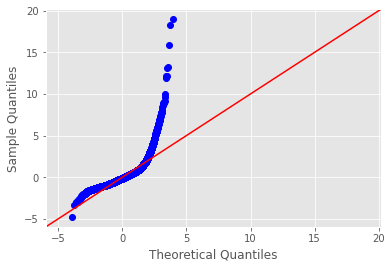

In [446]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True )

## Checking for Homoscedasticity 

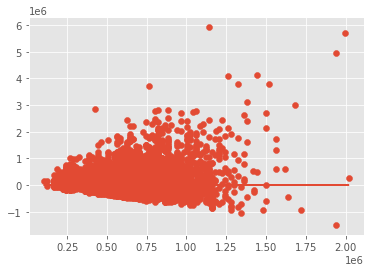

In [447]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]),[0 for i in range(len(df))])

## Model Refinement 3 

In [450]:
#Finding a cutoff point 
for i in range (90,99):
    q = i/100
    print('{} percentile:{}'.format(q, df_categorical_cleaned['price'].quantile(q=q)))

0.9 percentile:890000.0
0.91 percentile:920409.9999999999
0.92 percentile:957000.0
0.93 percentile:999999.43
0.94 percentile:1080000.0
0.95 percentile:1170000.0
0.96 percentile:1270000.0
0.97 percentile:1400000.0
0.98 percentile:1600000.0


In [453]:
subset = df_categorical_cleaned[df_categorical_cleaned['price'] <38]
print ("Percent removed:", len(df_categorical_cleaned)- len(subset))/len(df_categorical_cleaned)
outcome = 'price'
x_cols = x_cols = ['bathrooms','bedrooms']
#change x_cols for refinement model 2 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df).fit()
model.summary()

Percent removed: 19152


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

## Rechecking Normality 

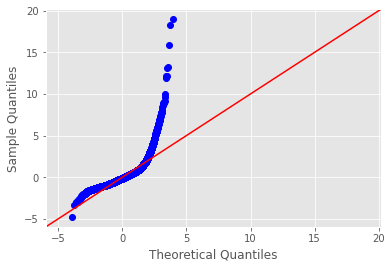

In [454]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True )

## Rechecking Homoscedasticity

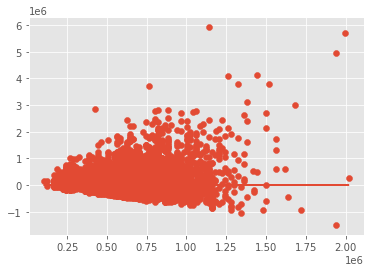

In [456]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]),[0 for i in range(len(df))])

In [452]:
y = df_cleaned['price']
X = df_cleaned.drop('price',axis=1)

 The prediction target for this analysis is the , so we are going to split the data into two sets fro training and testing 

In [307]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state =42)

For this project, you will use multiple linear regression modeling to analyze house sales in a northwestern county.

Key Points

## Data Modeling


## Regression Results 

## Conclusion


Recommendations 

## Next Steps 